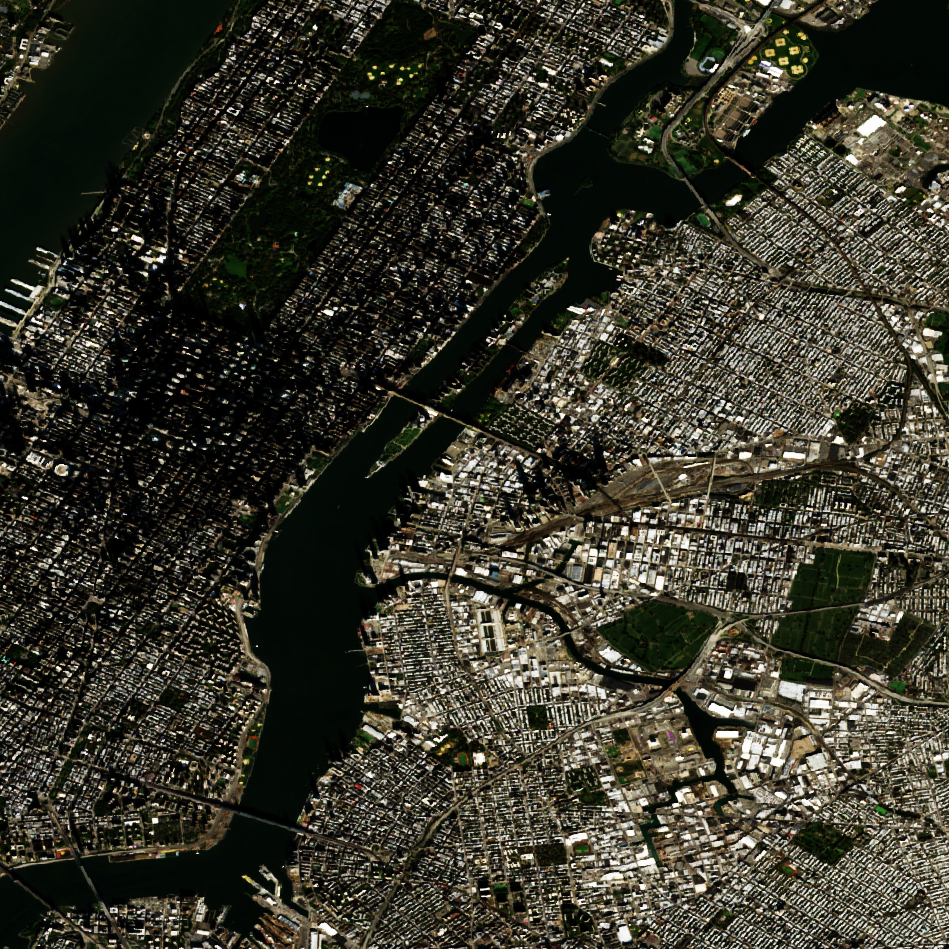

In [17]:
# Import required packages
import openeo
from openeo.processes import process

# Connect to the back-end
connection = openeo.connect("http://0.0.0.0:8080")
# ToDo: Here you need to authenticate with authenticate_basic() or authenticate_oidc()
connection.authenticate_basic("anonymous", "test123")

spatial_extent_east = -73.90
spatial_extent_north = 40.80
spatial_extent_south = 40.70
spatial_extent_west = -74.00

load1 = connection.load_collection(collection_id = "sentinel-2-global-mosaics", bands = ["B04", "B03", "B02"], properties = {}, spatial_extent = {"east": spatial_extent_east, "north": spatial_extent_north, "south": spatial_extent_south, "west": spatial_extent_west}, temporal_extent = ["2022-04-15T00:00:00Z", "2022-12-31T00:00:00Z"])
reduce = load1.process("apply_pixel_selection", data = load1, pixel_selection = "first")
color = reduce.process("color_formula", data = reduce, formula = "Gamma RGB 3.4 Saturation 1 Sigmoidal RGB 25 0.38")
save5 = color.save_result(format = "PNG")

# The process can be executed synchronously (see below), as batch job or as web service now
result = connection.download(save5)
# draw png in notebook
from IPython.display import Image
Image(result)
